In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

data = pd.read_csv('Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.drop(['CustomerID'], axis = 1, inplace = True)

In [4]:
data.shape

(200, 4)

In [5]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [6]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
pd.DataFrame(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


<Axes: ylabel='Age'>

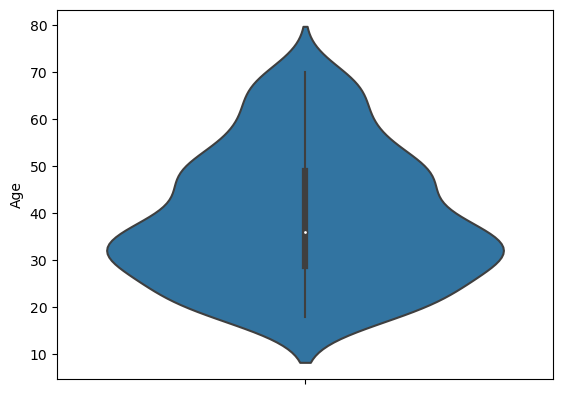

In [9]:
sns.axes_style("dark")
sns.violinplot(y=data["Age"])

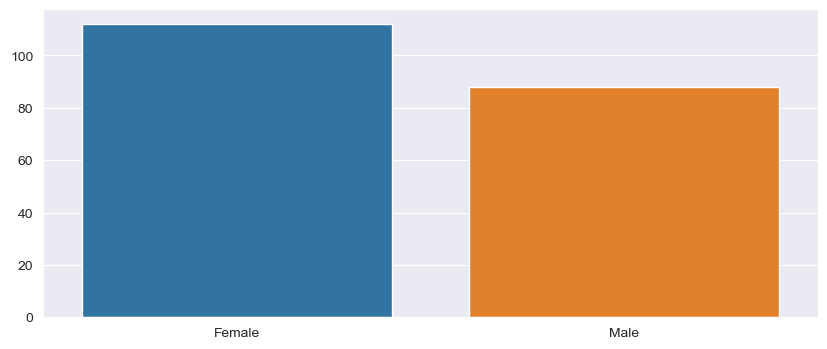

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x = data.Gender.value_counts().index, y = data.Gender.value_counts().values)
plt.show()

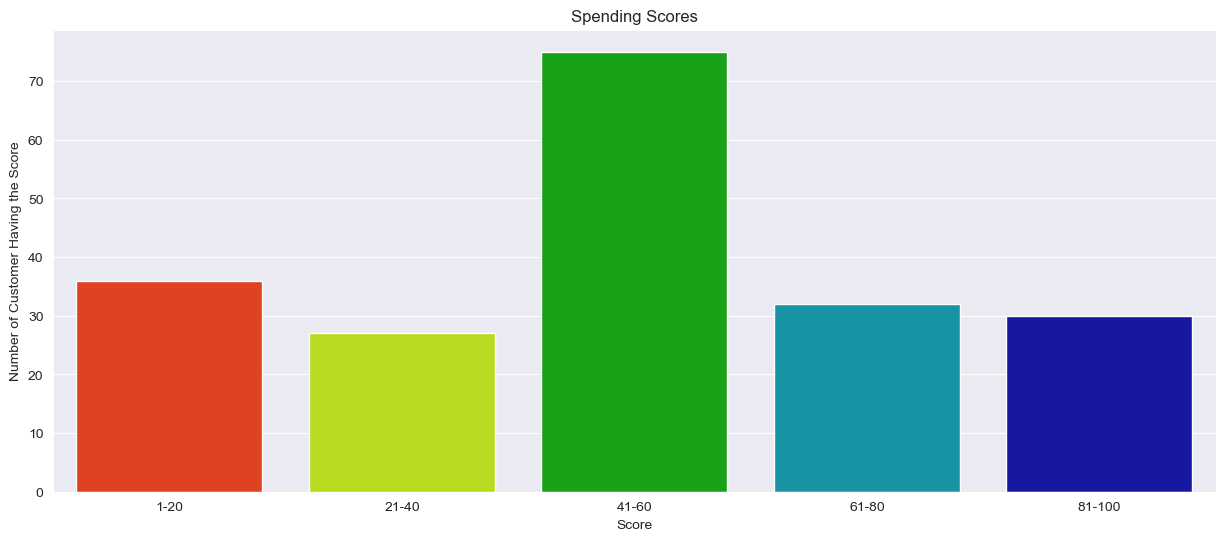

In [11]:
ss1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]
ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

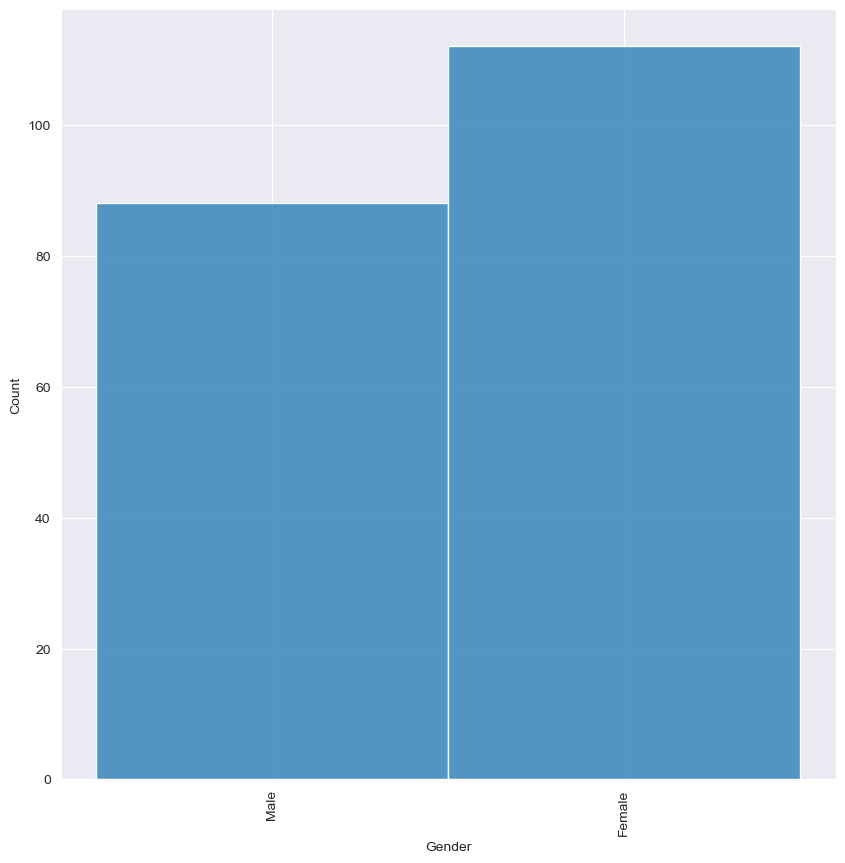

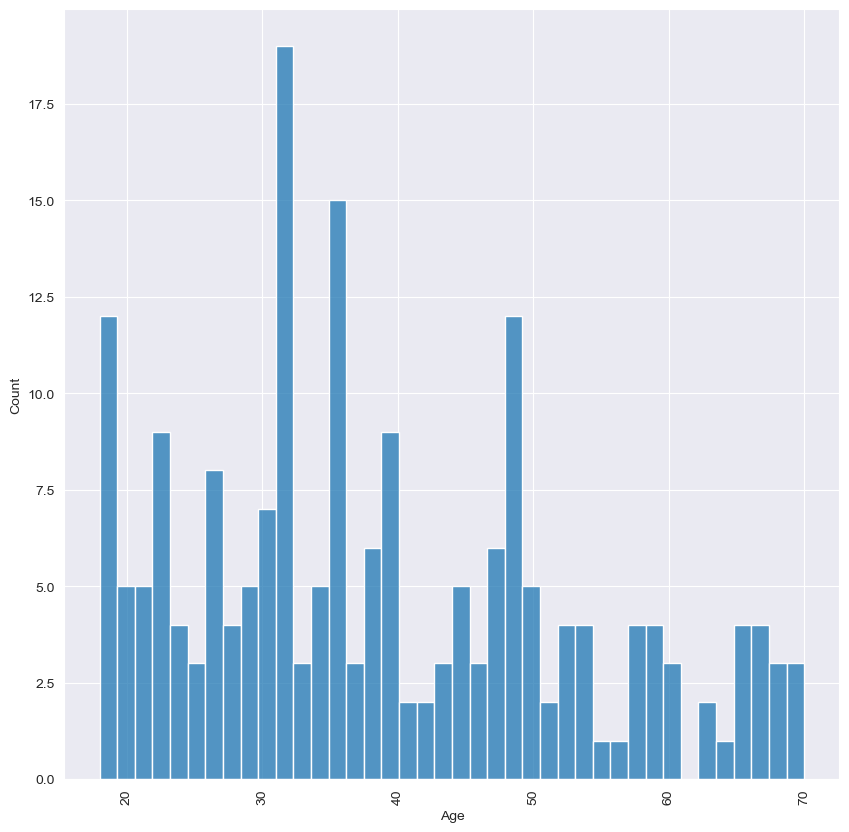

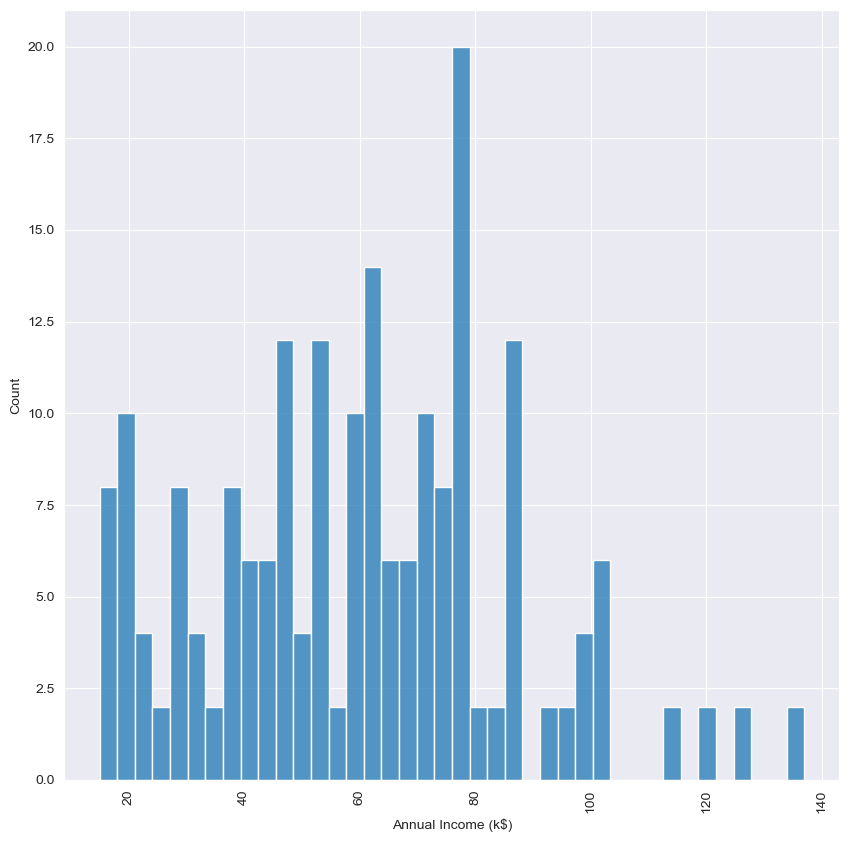

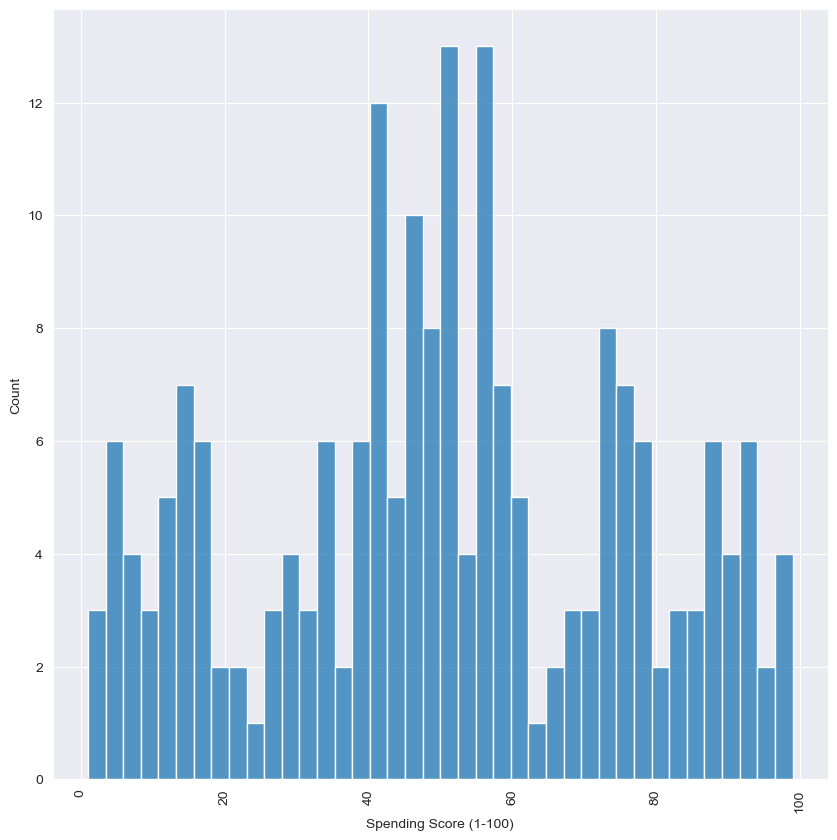

In [12]:
# Perform Exploratory Data Analysis (EDA)
# Visualize the relationship between features and spending score
# Histplot:

for i in data.columns:
    f= plt.figure(figsize=(10,10))
    ax = sns.histplot(x=data[i],data=data,bins=40)
    plt.xticks(rotation=90)

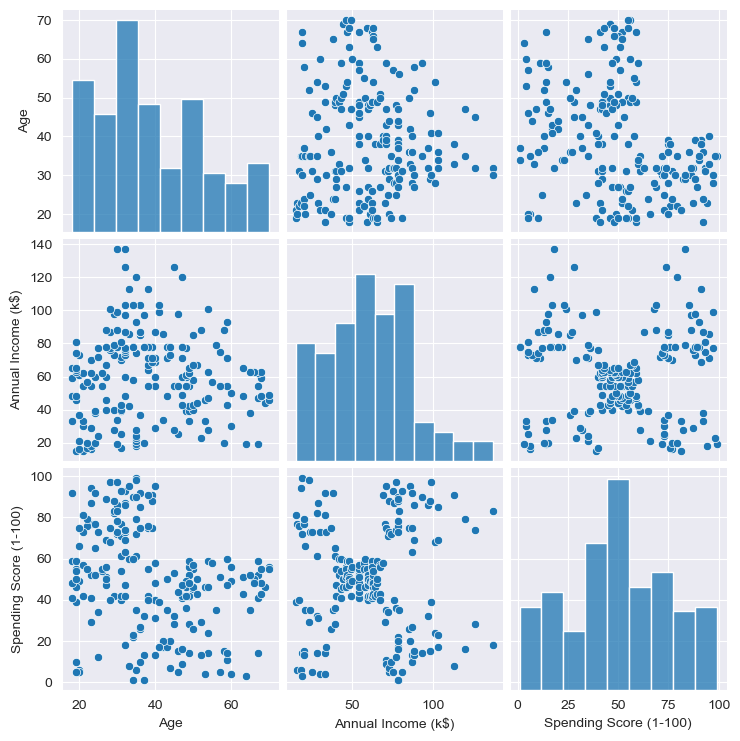

In [13]:
# Pairplot for numerical variables
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

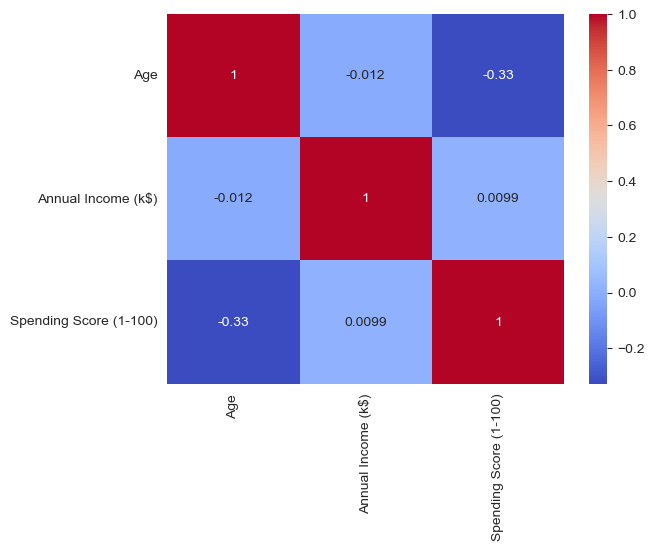

In [14]:
# Correlation matrix heatmap
correlation_matrix = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [15]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


In [16]:
# Segmentation using Age and Spending Score

'''Age and spending Score'''

X1 = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

inertia = []

for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# **Plotting the elbow curve**

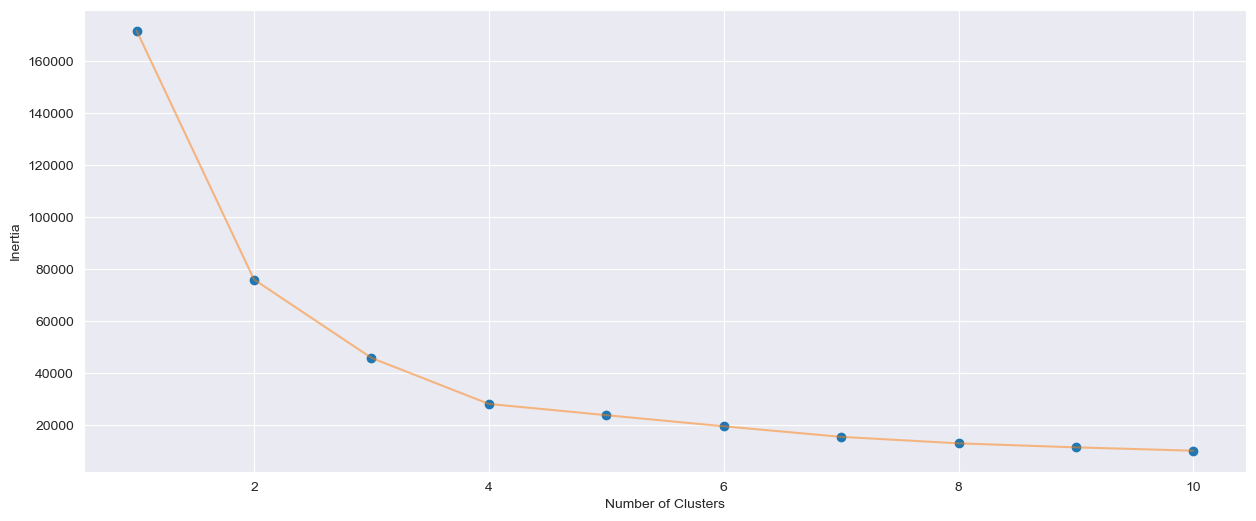

In [17]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

***Re Initializing K-Means algorithm with 4 clusters***

In [18]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [19]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

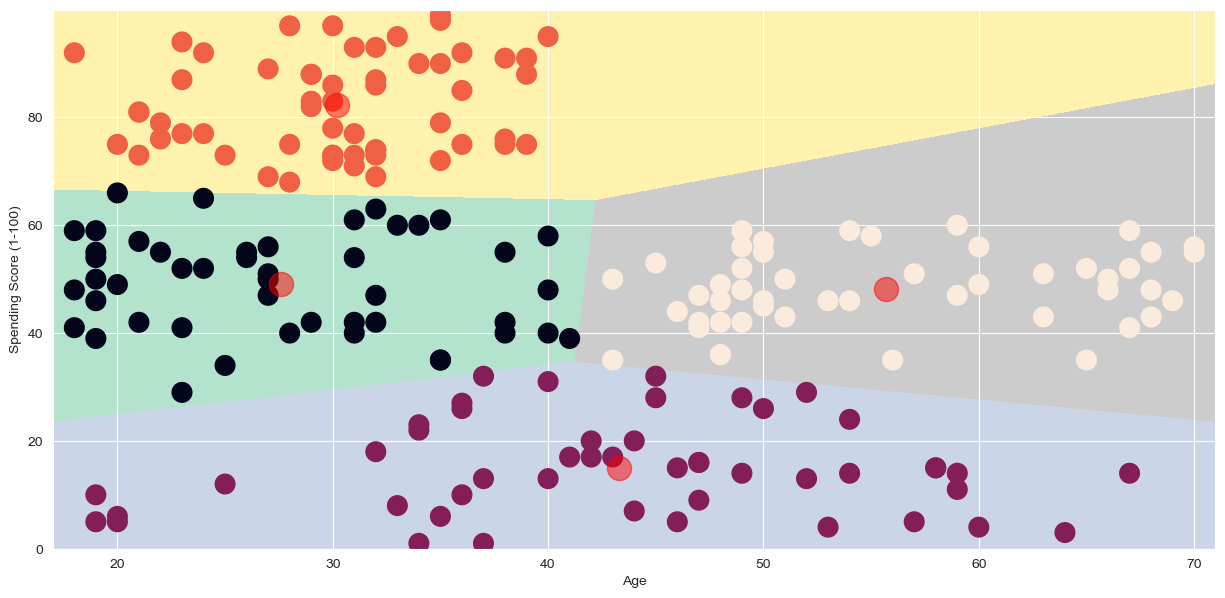

In [20]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = data , c = labels1 ,
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [21]:
labels1

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 0,
       1, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 3, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [22]:
# Add the cluster labels to your DataFrame
data['Cluster'] = labels1

# Iterate over each cluster and print the segmented data
for cluster_id in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster_id]
    print(f"\nData for Cluster {cluster_id}:\n")
    print(cluster_data)


Data for Cluster 0:

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0      Male   19                  15                      39        0
4    Female   31                  17                      40        0
16   Female   35                  21                      35        0
17     Male   20                  21                      66        0
20     Male   35                  24                      35        0
27     Male   35                  28                      61        0
43   Female   31                  39                      61        0
45   Female   24                  39                      65        0
47   Female   27                  40                      47        0
48   Female   29                  40                      42        0
49   Female   31                  40                      42        0
51     Male   33                  42                      60        0
52   Female   31                  43                      54        

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

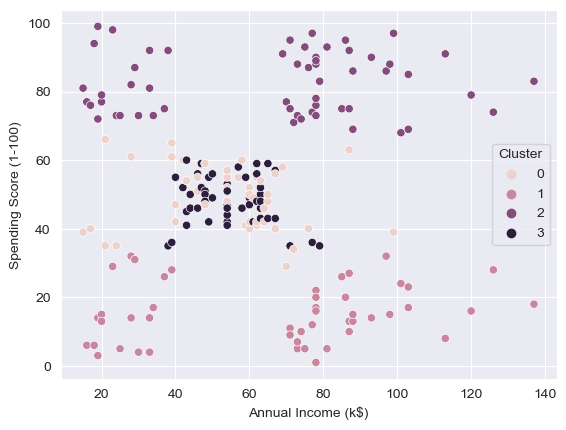

In [23]:
sns.scatterplot(x=data['Annual Income (k$)'],y=data['Spending Score (1-100)'],hue=data['Cluster'],legend=True)


In [24]:
data['Gender'] = data['Gender'].map({'Male' : 1, 'Female' : 0})

In [25]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data)

C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

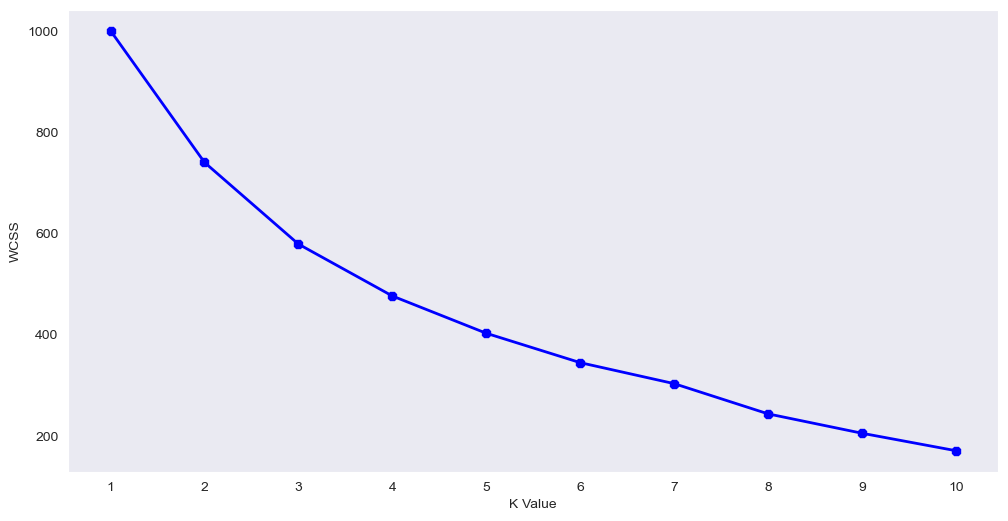

In [26]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):  
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,0
1,1,21,15,81,2
2,0,20,16,6,1
3,0,23,16,77,2
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,1


In [29]:
km = KMeans(n_clusters = 5)
clusters = km.fit_predict(data)
data['label'] = clusters
centroids = km.cluster_centers_

C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


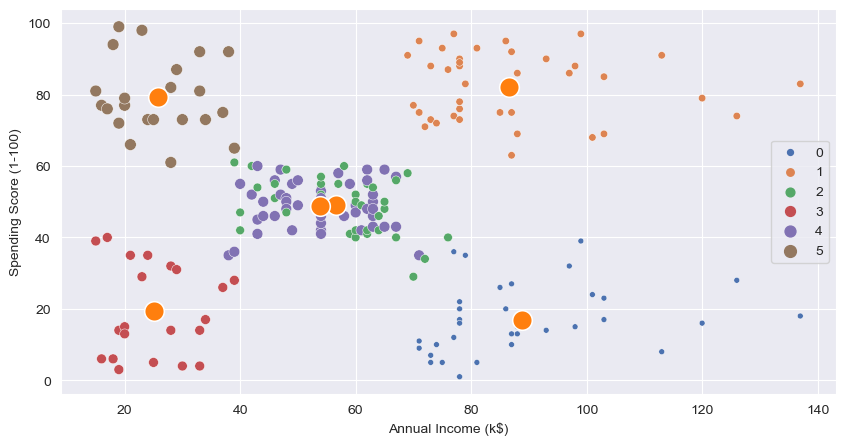

In [49]:
plt.figure(figsize = (10,5))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['label'], palette="deep", size=data['label'])
sns.scatterplot(x=centroids[:,2] , y=centroids[:,3] , s = 200)
plt.show()

C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

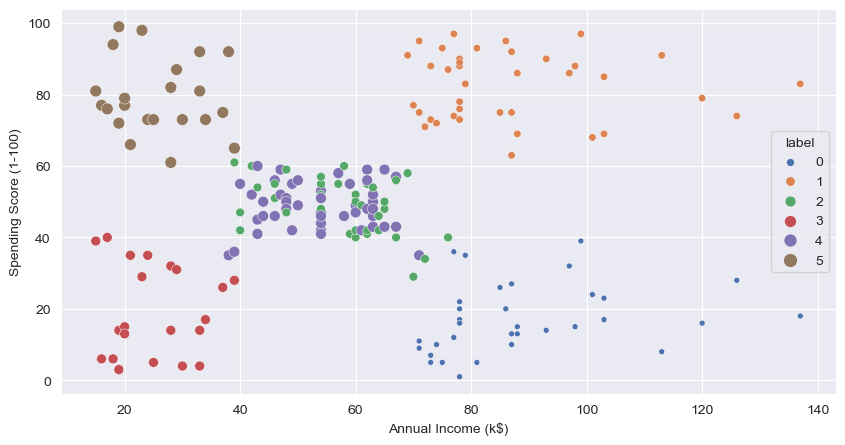

In [48]:
km = KMeans(n_clusters = 6)
clusters = km.fit_predict(data)
centroids = km.cluster_centers_
data["label"] = clusters
"""Centroid and Label Plots for Annual Income (k$) and Spendng Score (1-100)"""
plt.figure(figsize = (10,5))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue = data.label, palette="deep", size=data.label)

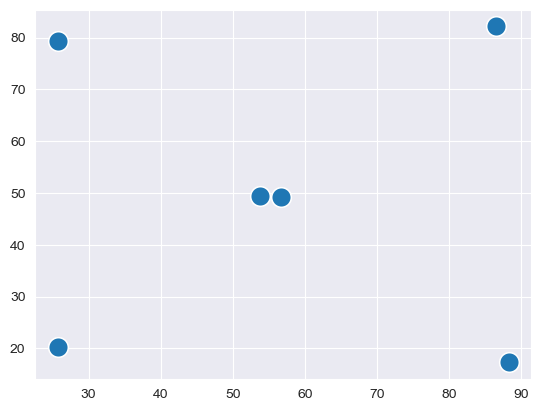

In [47]:
sns.scatterplot(x=centroids[:,2] , y=centroids[:,3] , s = 200)
plt.show()

In [33]:
from sklearn.metrics import silhouette_score

C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

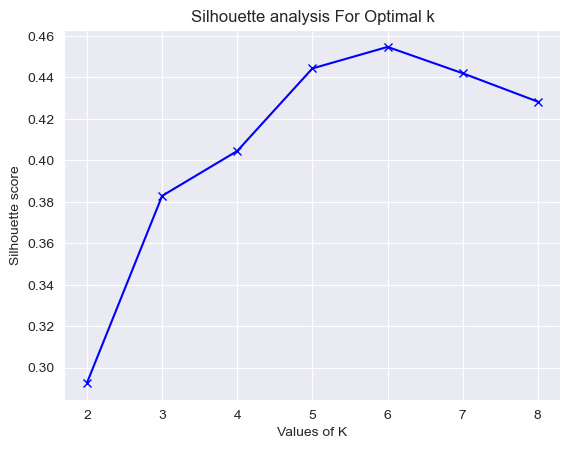

In [34]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_

    silhouette_avg.append(silhouette_score(data, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

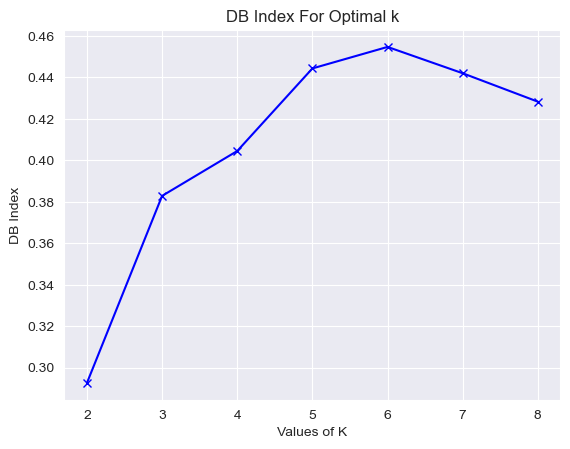

In [35]:
from sklearn.metrics import davies_bouldin_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
davies_bouldin_score_avg = []
for num_clusters in range_n_clusters:
    """initialise kmeans"""
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    """silhouette score"""
    davies_bouldin_score_avg.append(davies_bouldin_score(data, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('DB Index')
plt.title('DB Index For Optimal k')
plt.show()

In [36]:
from sklearn.cluster import DBSCAN

In [37]:
from sklearn import metrics
# Compute DBSCAN
db = DBSCAN(eps=0.45).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [38]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))

Estimated number of clusters: 6
Estimated number of noise points: 137
Silhouette Coefficient: -0.066


In [39]:
range_min = [x for x in range(2, 51, 1)]
range_eps = [x / 100.0 for x in range(1, 51, 1)]
# + <br />[y / 10.0 for y in range(1, 51, 1)] + <br />[round(z, 2) for z in np.arange(1.10, 1.31, 0.01)]
dic = {}
for m in range_min:
    for e in range_eps:
        model_1 = DBSCAN(eps = e, min_samples = m).fit(X)

In [50]:
range_min = [x for x in range(2, 51, 1)]
range_eps = [x / 100.0 for x in range(1, 51, 1)]
# + <br />[y / 10.0 for y in range(1, 51, 1)] + <br />[round(z, 2) for z in np.arange(1.10, 1.31, 0.01)]
dic = {}
for m in range_min:
    for e in range_eps:
        model_1 = DBSCAN(eps = e, min_samples = m).fit(X)
        core_samples_mask = np.zeros_like(model_1.labels_, dtype = bool)
        core_samples_mask[model_1.core_sample_indices_] = True
        labels = model_1.labels_
        data['label'] = labels
        if len( set(labels) ) > 1:
            silhouette_Avg = silhouette_score(X,data['label'])
            if silhouette_Avg > 0:
                dic[str(m) + " - " + str(e)] = silhouette_Avg
                print("min-sample value is: " + str(m) + " eps value is: " + str(e) , "The avearge silhouette_score is :",silhouette_Avg)

                print("Clusters", len(set(labels)))

max_key = max(dic, key = dic.get)
print("parameter values are: ", max_key)
print("maximum silhouette score value is: ", dic[max_key])

min-sample value is: 2 eps value is: 0.31 The avearge silhouette_score is : 0.020572741691827667
Clusters 39
min-sample value is: 2 eps value is: 0.32 The avearge silhouette_score is : 0.026642824816793677
Clusters 38
min-sample value is: 2 eps value is: 0.33 The avearge silhouette_score is : 0.026642824816793677
Clusters 38
min-sample value is: 2 eps value is: 0.34 The avearge silhouette_score is : 0.035442167243174796
Clusters 35
min-sample value is: 2 eps value is: 0.35 The avearge silhouette_score is : 0.035442167243174796
Clusters 35
min-sample value is: 2 eps value is: 0.36 The avearge silhouette_score is : 0.06621787361028113
Clusters 34
min-sample value is: 2 eps value is: 0.37 The avearge silhouette_score is : 0.07365159021164244
Clusters 34
min-sample value is: 2 eps value is: 0.38 The avearge silhouette_score is : 0.11305263822582629
Clusters 34
min-sample value is: 2 eps value is: 0.39 The avearge silhouette_score is : 0.11317991495305751
Clusters 33
min-sample value is: 2 

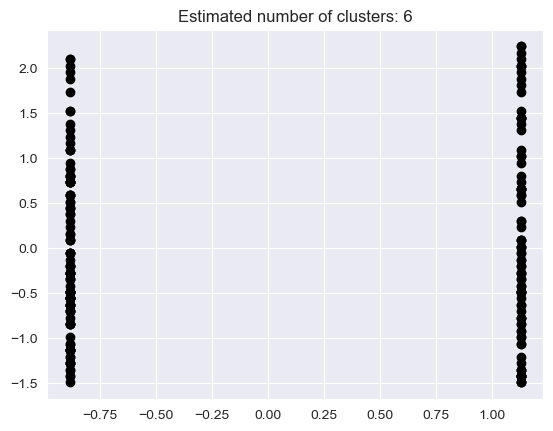

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)

for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
       # Black used for noise.
       col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),

             markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),

             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

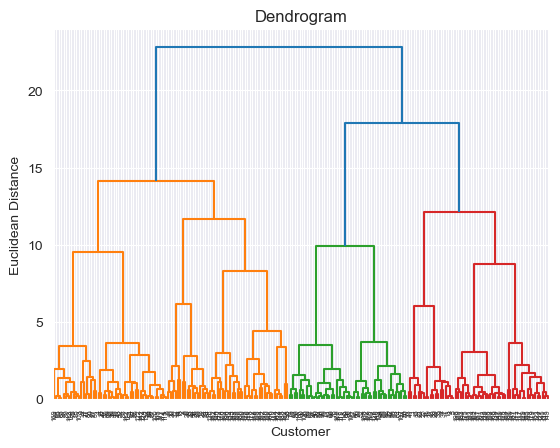

In [42]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean Distance')
plt.show()

C:\Users\Aliwaris\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


CLusters : {0, 1, 2}
Silhouette Coefficient: 0.296


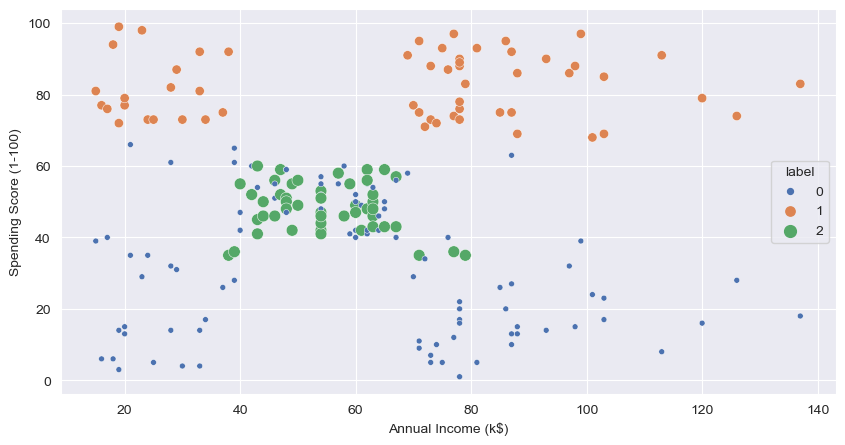

In [51]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
labels = hc.fit_predict(X)
print(f"CLusters : {set(labels)}")
data['label'] = labels
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))
"""Label Plots for Annual Income (k$) and Spendng Score (1-100)"""
plt.figure(figsize = (10,5))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue = data.label, palette="deep", size=data.label)
# sns.scatterplot(centroids[:,2] , centroids[:,3] , s = 200)
plt.show()